<a href="https://colab.research.google.com/github/AbrarAli-SE/Code-a-Ai/blob/main/Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: **Abrar Ali**
# SAP ID: **55843**
# lab 12


Classification report for classifier SVC():

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.57      0.64      0.61        36
           2       0.69      0.71      0.70        35
           3       0.86      0.49      0.62        37
           4       0.76      0.92      0.83        37
           5       0.38      0.16      0.23        37
           6       0.79      0.73      0.76        37
           7       0.53      0.69      0.60        36
           8       0.37      0.67      0.48        33
           9       0.76      0.59      0.67        37

    accuracy                           0.64       360
   macro avg       0.66      0.64      0.63       360
weighted avg       0.66      0.64      0.63       360



<Figure size 1000x600 with 0 Axes>

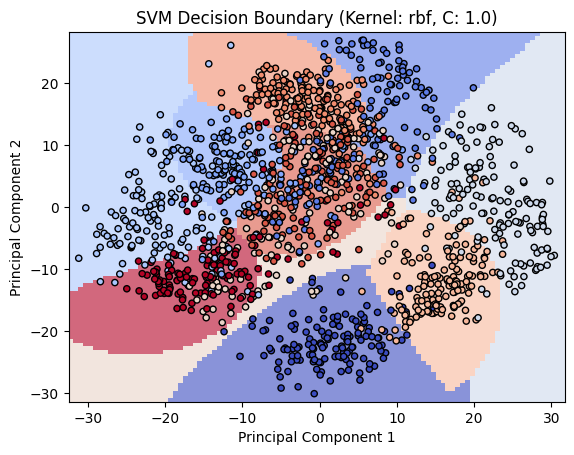

In [1]:
# ==========================================
# LAB 12 TASK SOLUTION: SVM on Image Dataset
# ==========================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

# 1. Load the Dataset (Image Data: Handwritten Digits)
# ---------------------------------------------------
digits = datasets.load_digits()

# Flatten the images (8x8 pixels = 64 features)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 2. Reduce Dimensions for Visualization (Optional but recommended for 2D plotting)
# -------------------------------------------------------------------------------
# We use PCA to reduce the 64 features down to 2 so we can plot a 2D boundary.
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    data_2d, digits.target, test_size=0.2, shuffle=False
)

# ==============================================================================
# 3. Build and Train SVM Model (CHANGE PARAMETERS HERE AS REQUIRED)
# ==============================================================================
# Task Instructions: Change 'kernel', 'C', and 'gamma' to analyze effects.
# Options for kernel: 'linear', 'poly', 'rbf'
# Options for gamma: 'scale', 'auto', or a float like 0.1, 0.001
# Options for C: 0.1, 1.0, 10.0, 100.0

classifier = svm.SVC(kernel="rbf", C=1.0, gamma="scale")

# Train the model
classifier.fit(X_train, y_train)

# 4. Evaluation
# -------------
predicted = classifier.predict(X_test)
print(f"Classification report for classifier {classifier}:\n")
print(metrics.classification_report(y_test, predicted))

# 5. Plotting the Decision Boundary
# ---------------------------------
plt.figure(figsize=(10, 6))

# Create the decision boundary display
DecisionBoundaryDisplay.from_estimator(
    classifier,
    X_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.6
)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k", s=20)
plt.title(f"SVM Decision Boundary (Kernel: {classifier.kernel}, C: {classifier.C})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()